## Spatially differentiable convolutional neural network (SDCNN) for robot pose prediction example usage.

<img src="./data/SDCNN_workflow.png" width=50% height=50%>

In [1]:
import sdcnn
import utils

In [2]:
effectorLength = 4.5 # mm, End effector width to make contact with each shape.
conversionRatio = 0.081 # mm/pixels, convert mm -> pixels. Calculate from input image resolution.

In [3]:
# Create a grid of shape priors.
grid = 6 # Size of the grid of different shapes to predict poses for.
shapes = utils.generateShapes(gridsize=grid, radius=45, imagesize=200) # Generate grid of shapes.

In [4]:
# Download SDCNN weights if not already downloaded.
filename = 'SDCNN_weights_compressed.pth'
sdcnn.downloadWeights(filename=filename, url='https://osf.io/download/npcuh')

data\SDCNN_weights_compressed.pth is already downloaded.


In [5]:
# Load weights into network architecture.
SDCNN = sdcnn.loadNetwork(filename, folder='./data/', device='cpu', k_poses=3, scale_factor=0.15)

Loading SDCNN Weights . . .
Successfully Loaded SDCNN Weights!


In [6]:
# Predict poses onto shapes using the SDCNN.
poses = sdcnn.predictPoses(shapes, SDCNN, device='cpu', augment=True)

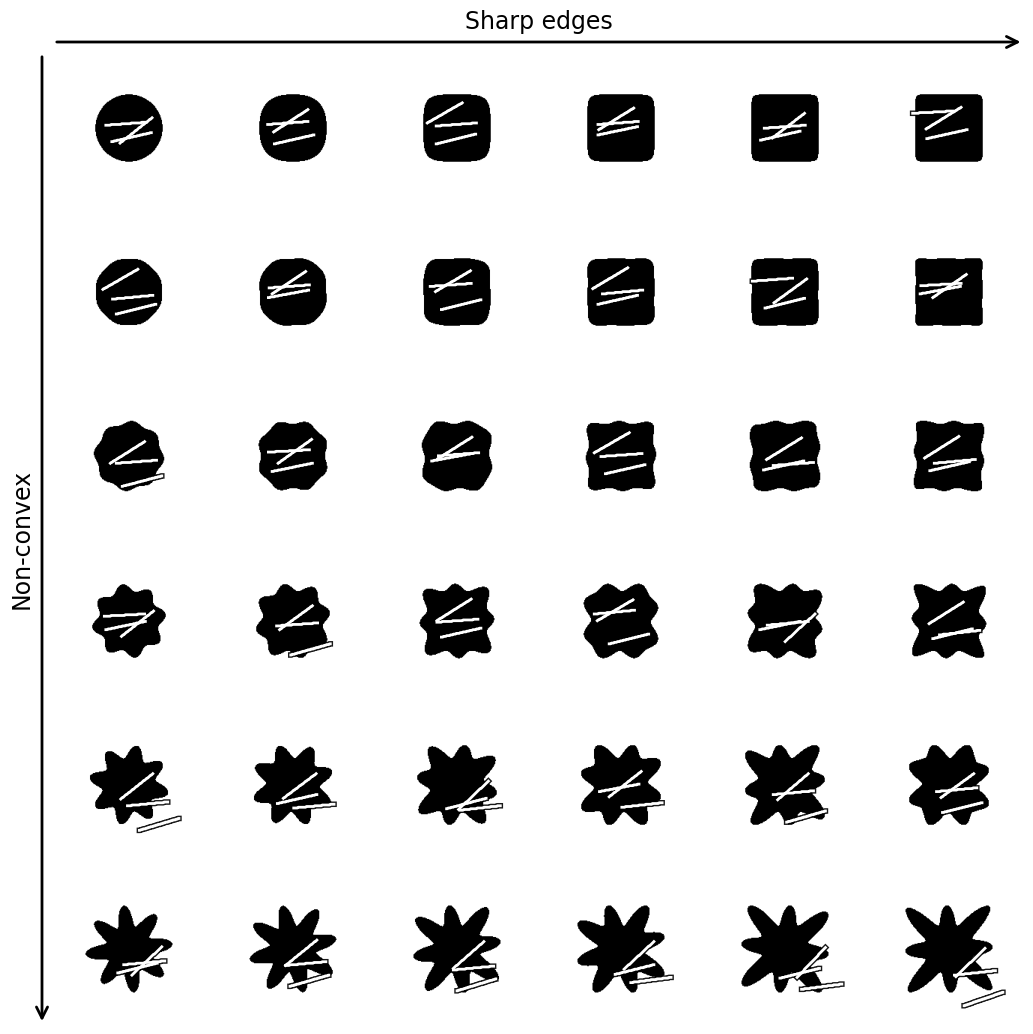

In [7]:
# Plot results.
utils.plotPoses(shapes, poses, gridsize=grid, effectorLengthPixels = effectorLength/conversionRatio, save=True)

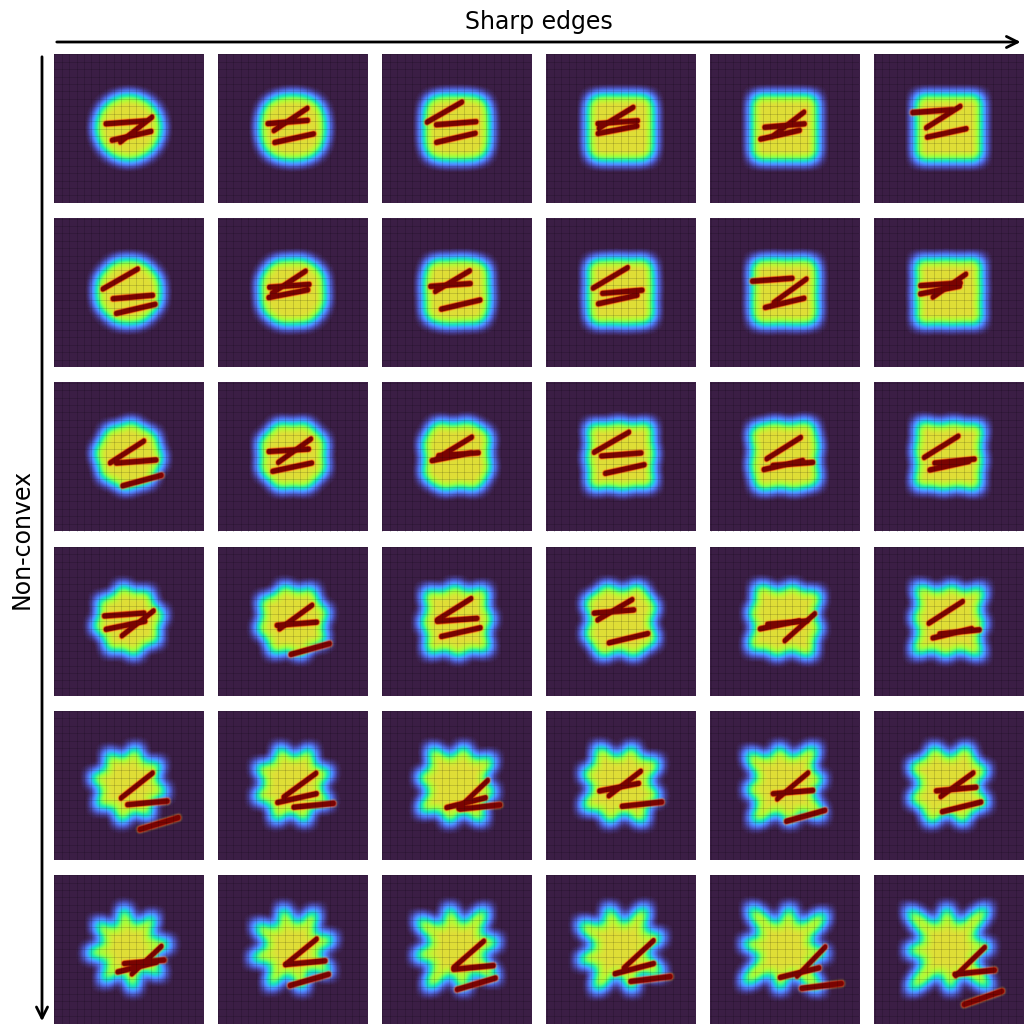

In [8]:
# Plot differentiable map.
utils.plotPosesDifferentiable(shapes, poses, imagesize=200, gridsize=grid, effectorLengthPixels = effectorLength/conversionRatio, device='cpu', save=True)